# Hyperparameter Tuning - Optimizer

In [53]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import Adadelta
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from numpy import asarray
from sklearn.metrics import mean_absolute_error

In [54]:
"""
Resource 1
"""
def create_model(n, optimizer, dropout_rate):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(n,)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='relu'))
    
    model.compile(loss='mse', optimizer = optimizer, metrics=['mae'])
    
    return model

### Splitting the Data  - from feature selection model mutual_info_regression

In [55]:
# Mutual Info Regression
y = pd.read_csv('y.csv')
x2_mutualinforegression = pd.read_csv('x2_mutualinforegression.csv')
n = len(x2_mutualinforegression.columns)
X_train, X_test, y_train, y_test = train_test_split(x2_mutualinforegression, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, n

((728, 16), (182, 16), 16)

### Batch Size

In [ ]:
batch_size = 1

## Optimizer
### Testing optimizer: Adam, RMSProp, Adagrad, Adadelta

### Adam

In [77]:
"""
Resource 2
"""
model_optimizer1 = create_model(n, Adam(learning_rate = 0.0001), 0.2)

history_optimizer1 = model_optimizer1.fit(X_train, y_train,
                                          validation_split = 0.2,
                                          epochs=200,
                                          batch_size=batch_size,
                                          verbose=1,
                                         )

Epoch 1/200
582/582 [==============================] - 1s 1ms/step - loss: 897.9841 - mae: 6.1642 - val_loss: 792.6303 - val_mae: 7.4771
Epoch 2/200
582/582 [==============================] - 1s 926us/step - loss: 871.1285 - mae: 6.1096 - val_loss: 756.1400 - val_mae: 7.3558
Epoch 3/200
582/582 [==============================] - 1s 884us/step - loss: 841.5566 - mae: 6.0772 - val_loss: 712.0823 - val_mae: 7.2158
Epoch 4/200
582/582 [==============================] - 1s 912us/step - loss: 771.8173 - mae: 5.9706 - val_loss: 638.0287 - val_mae: 6.9350
Epoch 5/200
582/582 [==============================] - 1s 916us/step - loss: 724.5002 - mae: 5.8105 - val_loss: 563.1044 - val_mae: 6.5296
Epoch 6/200
582/582 [==============================] - 1s 907us/step - loss: 646.5285 - mae: 5.4677 - val_loss: 480.6847 - val_mae: 6.0024
Epoch 7/200
582/582 [==============================] - 1s 918us/step - loss: 569.2142 - mae: 5.0854 - val_loss: 409.4360 - val_mae: 5.3640
Epoch 8/200
582/582 [========

582/582 [==============================] - 1s 998us/step - loss: 39.6497 - mae: 1.9160 - val_loss: 287.9969 - val_mae: 3.6862
Epoch 61/200
582/582 [==============================] - 1s 985us/step - loss: 35.4895 - mae: 1.8058 - val_loss: 255.9689 - val_mae: 3.5044
Epoch 62/200
582/582 [==============================] - 1s 978us/step - loss: 50.7166 - mae: 2.0659 - val_loss: 219.7542 - val_mae: 3.4096
Epoch 63/200
582/582 [==============================] - 1s 962us/step - loss: 57.1022 - mae: 2.0979 - val_loss: 277.2567 - val_mae: 3.6281
Epoch 64/200
582/582 [==============================] - 1s 958us/step - loss: 49.9745 - mae: 1.9320 - val_loss: 300.4499 - val_mae: 3.7838
Epoch 65/200
582/582 [==============================] - 1s 961us/step - loss: 42.1170 - mae: 1.9303 - val_loss: 248.3101 - val_mae: 3.5219
Epoch 66/200
582/582 [==============================] - 1s 956us/step - loss: 38.2611 - mae: 1.9197 - val_loss: 308.4064 - val_mae: 3.8226
Epoch 67/200
582/582 [==================

Epoch 119/200
582/582 [==============================] - 1s 937us/step - loss: 49.0127 - mae: 1.7939 - val_loss: 259.1937 - val_mae: 3.6060
Epoch 120/200
582/582 [==============================] - 1s 965us/step - loss: 27.0299 - mae: 1.6408 - val_loss: 225.5151 - val_mae: 3.4445
Epoch 121/200
582/582 [==============================] - 1s 964us/step - loss: 29.3378 - mae: 1.6636 - val_loss: 226.6636 - val_mae: 3.4257
Epoch 122/200
582/582 [==============================] - 1s 953us/step - loss: 28.1726 - mae: 1.6876 - val_loss: 206.6240 - val_mae: 3.3565
Epoch 123/200
582/582 [==============================] - 1s 994us/step - loss: 22.4972 - mae: 1.5353 - val_loss: 265.6562 - val_mae: 3.7090
Epoch 124/200
582/582 [==============================] - 1s 1ms/step - loss: 26.9483 - mae: 1.6832 - val_loss: 252.4091 - val_mae: 3.5799
Epoch 125/200
582/582 [==============================] - 1s 988us/step - loss: 21.1246 - mae: 1.5285 - val_loss: 239.1944 - val_mae: 3.4919
Epoch 126/200
582/582 

582/582 [==============================] - 1s 1ms/step - loss: 18.9660 - mae: 1.4603 - val_loss: 182.0903 - val_mae: 3.1157
Epoch 179/200
582/582 [==============================] - 1s 1ms/step - loss: 33.5826 - mae: 1.7423 - val_loss: 248.2491 - val_mae: 3.4046
Epoch 180/200
582/582 [==============================] - 1s 1ms/step - loss: 18.1166 - mae: 1.5045 - val_loss: 228.7931 - val_mae: 3.2939
Epoch 181/200
582/582 [==============================] - 1s 1ms/step - loss: 14.5848 - mae: 1.3547 - val_loss: 145.6299 - val_mae: 2.9409
Epoch 182/200
582/582 [==============================] - 1s 1ms/step - loss: 21.1819 - mae: 1.5417 - val_loss: 170.0943 - val_mae: 2.9879
Epoch 183/200
582/582 [==============================] - 1s 2ms/step - loss: 31.7905 - mae: 1.5711 - val_loss: 173.5620 - val_mae: 3.0589
Epoch 184/200
582/582 [==============================] - 1s 1ms/step - loss: 31.3837 - mae: 1.7512 - val_loss: 129.5082 - val_mae: 2.7508
Epoch 185/200
582/582 [=========================

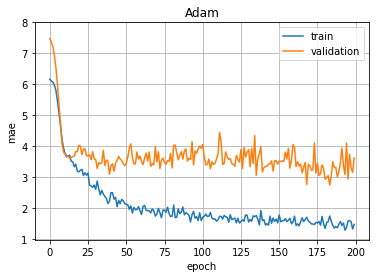

6/6 [==============================] - 0s 1ms/step - loss: 145.8040 - mae: 2.3635


[145.80398559570312, 2.3634872436523438]

In [78]:
plt.plot(history_optimizer1.history['mae'])
plt.plot(history_optimizer1.history['val_mae'])
plt.title('Adam')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.ylim(top = 8)
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.show()

score_optimizer1 = model_optimizer1.evaluate(X_test, y_test, verbose=1)
score_optimizer1

### Adagrad

In [79]:
"""
Resource 2
From documentation: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adagrad
Note that Adagrad tends to benefit from higher initial learning rate values compared to other optimizers.
"""
model_optimizer2 = create_model(n, Adagrad(learning_rate = 0.05), 0.2)

history_optimizer2 = model_optimizer2.fit(X_train,
                                          y_train,
                                          validation_split = 0.2,
                                          epochs=200,
                                          batch_size=batch_size,
                                          verbose=1
                                         )

Epoch 1/200
582/582 [==============================] - 1s 1ms/step - loss: 673.2257 - mae: 5.4079 - val_loss: 185.4164 - val_mae: 3.4500
Epoch 2/200
582/582 [==============================] - 1s 865us/step - loss: 442.2766 - mae: 4.4571 - val_loss: 157.0486 - val_mae: 3.5270
Epoch 3/200
582/582 [==============================] - 1s 902us/step - loss: 225.4158 - mae: 3.5901 - val_loss: 171.3632 - val_mae: 3.7745
Epoch 4/200
582/582 [==============================] - 1s 881us/step - loss: 178.5566 - mae: 3.5062 - val_loss: 111.4214 - val_mae: 2.7504
Epoch 5/200
582/582 [==============================] - 1s 957us/step - loss: 197.3233 - mae: 3.1549 - val_loss: 239.4334 - val_mae: 4.1830
Epoch 6/200
582/582 [==============================] - 1s 888us/step - loss: 322.0127 - mae: 3.4670 - val_loss: 134.2814 - val_mae: 2.9010
Epoch 7/200
582/582 [==============================] - 1s 873us/step - loss: 114.2396 - mae: 2.7593 - val_loss: 122.7321 - val_mae: 3.0057
Epoch 8/200
582/582 [========

Epoch 60/200
582/582 [==============================] - 1s 898us/step - loss: 24.4003 - mae: 1.3995 - val_loss: 116.7195 - val_mae: 2.4447
Epoch 61/200
582/582 [==============================] - 1s 942us/step - loss: 32.2837 - mae: 1.5655 - val_loss: 190.5828 - val_mae: 3.2303
Epoch 62/200
582/582 [==============================] - 1s 879us/step - loss: 11.1783 - mae: 1.1970 - val_loss: 158.0198 - val_mae: 2.9241
Epoch 63/200
582/582 [==============================] - 0s 853us/step - loss: 22.8904 - mae: 1.4763 - val_loss: 174.5704 - val_mae: 3.0678
Epoch 64/200
582/582 [==============================] - 1s 946us/step - loss: 20.5268 - mae: 1.3621 - val_loss: 220.2297 - val_mae: 3.4258
Epoch 65/200
582/582 [==============================] - 0s 857us/step - loss: 20.1331 - mae: 1.3951 - val_loss: 246.2660 - val_mae: 3.6233
Epoch 66/200
582/582 [==============================] - 1s 865us/step - loss: 22.8989 - mae: 1.4132 - val_loss: 176.3192 - val_mae: 3.0667
Epoch 67/200
582/582 [=====

Epoch 119/200
582/582 [==============================] - 1s 961us/step - loss: 15.0437 - mae: 1.1460 - val_loss: 196.1145 - val_mae: 3.2736
Epoch 120/200
582/582 [==============================] - 1s 1ms/step - loss: 12.5954 - mae: 1.0529 - val_loss: 247.9690 - val_mae: 3.7077
Epoch 121/200
582/582 [==============================] - 1s 986us/step - loss: 29.7537 - mae: 1.1721 - val_loss: 177.7973 - val_mae: 3.0105
Epoch 122/200
582/582 [==============================] - 1s 995us/step - loss: 11.5791 - mae: 1.0628 - val_loss: 190.5899 - val_mae: 3.1664
Epoch 123/200
582/582 [==============================] - 1s 935us/step - loss: 12.1645 - mae: 1.0591 - val_loss: 194.8779 - val_mae: 3.1828
Epoch 124/200
582/582 [==============================] - 1s 907us/step - loss: 17.6493 - mae: 1.0772 - val_loss: 152.0235 - val_mae: 2.6700
Epoch 125/200
582/582 [==============================] - 1s 944us/step - loss: 11.8070 - mae: 1.0958 - val_loss: 193.8604 - val_mae: 3.2196
Epoch 126/200
582/582 

Epoch 178/200
582/582 [==============================] - 1s 1ms/step - loss: 9.6409 - mae: 1.0615 - val_loss: 197.8364 - val_mae: 3.2453
Epoch 179/200
582/582 [==============================] - 1s 991us/step - loss: 22.4416 - mae: 1.1145 - val_loss: 215.2242 - val_mae: 3.3645
Epoch 180/200
582/582 [==============================] - 1s 965us/step - loss: 8.2651 - mae: 0.9612 - val_loss: 203.4678 - val_mae: 3.2588
Epoch 181/200
582/582 [==============================] - 1s 898us/step - loss: 12.1565 - mae: 1.0151 - val_loss: 221.0372 - val_mae: 3.4326
Epoch 182/200
582/582 [==============================] - 1s 879us/step - loss: 17.5632 - mae: 1.0613 - val_loss: 195.4202 - val_mae: 3.1714
Epoch 183/200
582/582 [==============================] - 1s 878us/step - loss: 12.6018 - mae: 1.0449 - val_loss: 173.7766 - val_mae: 2.8866
Epoch 184/200
582/582 [==============================] - 1s 904us/step - loss: 11.4163 - mae: 1.0016 - val_loss: 199.5882 - val_mae: 3.2715
Epoch 185/200
582/582 [=

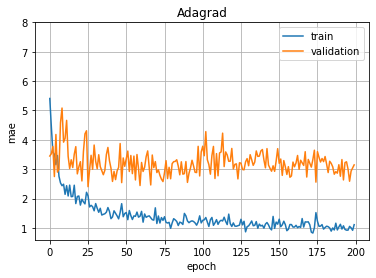

6/6 [==============================] - 0s 1ms/step - loss: 62.6447 - mae: 2.0876


[62.64467239379883, 2.0875558853149414]

In [80]:
"""
Resource 3
"""
plt.plot(history_optimizer2.history['mae'])
plt.plot(history_optimizer2.history['val_mae'])
plt.title('Adagrad')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.ylim(top = 8)
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.show()

score_optimizer2 = model_optimizer2.evaluate(X_test, y_test, verbose=1)
score_optimizer2

### RMSprop

In [70]:
"""
Resource 2
"""
model_optimizer3 = create_model(n, RMSprop(learning_rate = 0.0001), 0.2)

history_optimizer3 = model_optimizer3.fit(X_train,
                                          y_train,
                                          validation_split = 0.2,
                                          epochs=200,
                                          batch_size=batch_size,
                                          verbose=1)

Epoch 1/200
582/582 [==============================] - 1s 1ms/step - loss: 915.9196 - mae: 6.2081 - val_loss: 835.8110 - val_mae: 7.6593
Epoch 2/200
582/582 [==============================] - 1s 903us/step - loss: 906.8724 - mae: 6.1673 - val_loss: 816.8517 - val_mae: 7.5752
Epoch 3/200
582/582 [==============================] - 1s 951us/step - loss: 887.0278 - mae: 6.1442 - val_loss: 791.5674 - val_mae: 7.4875
Epoch 4/200
582/582 [==============================] - 1s 888us/step - loss: 870.6708 - mae: 6.1158 - val_loss: 758.7914 - val_mae: 7.3614
Epoch 5/200
582/582 [==============================] - 1s 935us/step - loss: 847.3201 - mae: 6.0709 - val_loss: 726.5950 - val_mae: 7.2208
Epoch 6/200
582/582 [==============================] - 1s 914us/step - loss: 812.3625 - mae: 5.9408 - val_loss: 684.0583 - val_mae: 7.0208
Epoch 7/200
582/582 [==============================] - 1s 861us/step - loss: 789.9927 - mae: 5.8697 - val_loss: 636.7359 - val_mae: 6.7415
Epoch 8/200
582/582 [========

Epoch 118/200
582/582 [==============================] - 1s 946us/step - loss: 101.7352 - mae: 2.2348 - val_loss: 158.5921 - val_mae: 2.9990
Epoch 119/200
582/582 [==============================] - 1s 935us/step - loss: 123.4856 - mae: 2.4000 - val_loss: 162.4302 - val_mae: 3.0097
Epoch 120/200
582/582 [==============================] - 1s 930us/step - loss: 72.4368 - mae: 2.1489 - val_loss: 184.1821 - val_mae: 3.2114
Epoch 121/200
582/582 [==============================] - 1s 943us/step - loss: 103.6995 - mae: 2.3314 - val_loss: 171.2216 - val_mae: 3.0686
Epoch 122/200
582/582 [==============================] - 1s 967us/step - loss: 74.4639 - mae: 2.1579 - val_loss: 169.0327 - val_mae: 3.0520
Epoch 123/200
582/582 [==============================] - 1s 944us/step - loss: 88.6994 - mae: 2.2639 - val_loss: 187.9358 - val_mae: 3.2154
Epoch 124/200
582/582 [==============================] - 1s 905us/step - loss: 99.1706 - mae: 2.2615 - val_loss: 160.9084 - val_mae: 2.9857
Epoch 125/200
582

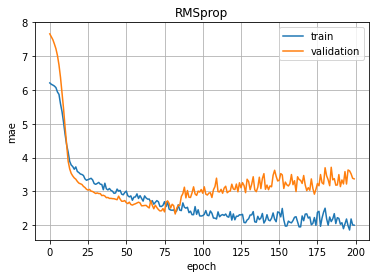

6/6 [==============================] - 0s 1ms/step - loss: 207.2568 - mae: 2.7087


[207.25680541992188, 2.708735942840576]

In [71]:
"""
Resource 3
"""
plt.plot(history_optimizer3.history['mae'])
plt.plot(history_optimizer3.history['val_mae'])
plt.title('RMSprop')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.ylim(top = 8)
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.show()

score_optimizer3 = model_optimizer3.evaluate(X_test, y_test, verbose=1)
score_optimizer3

### Adadelta

In [72]:
"""
Resource 2
"""
model_optimizer4 = create_model(n, Adadelta(learning_rate = 0.1), 0.2)

history_optimizer4 = model_optimizer4.fit(X_train,
                                          y_train,
                                          validation_split = 0.2,
                                          epochs=200,
                                          batch_size=batch_size,
                                          verbose=1
                                         )

Epoch 1/200
582/582 [==============================] - 1s 1ms/step - loss: 921.3691 - mae: 6.2722 - val_loss: 846.3328 - val_mae: 7.8029
Epoch 2/200
582/582 [==============================] - 1s 967us/step - loss: 921.3685 - mae: 6.2720 - val_loss: 846.3280 - val_mae: 7.8021
Epoch 3/200
582/582 [==============================] - 1s 932us/step - loss: 921.3613 - mae: 6.2709 - val_loss: 846.3004 - val_mae: 7.7927
Epoch 4/200
582/582 [==============================] - 1s 966us/step - loss: 921.3000 - mae: 6.2576 - val_loss: 846.2330 - val_mae: 7.7731
Epoch 5/200
582/582 [==============================] - 1s 903us/step - loss: 921.1866 - mae: 6.2365 - val_loss: 846.1151 - val_mae: 7.7555
Epoch 6/200
582/582 [==============================] - 1s 872us/step - loss: 921.0009 - mae: 6.2173 - val_loss: 845.9833 - val_mae: 7.7390
Epoch 7/200
582/582 [==============================] - 1s 914us/step - loss: 920.7217 - mae: 6.2012 - val_loss: 845.4874 - val_mae: 7.7217
Epoch 8/200
582/582 [========

Epoch 60/200
582/582 [==============================] - 1s 965us/step - loss: 346.2415 - mae: 3.5171 - val_loss: 212.1399 - val_mae: 3.5029
Epoch 61/200
582/582 [==============================] - 1s 916us/step - loss: 327.7674 - mae: 3.5381 - val_loss: 204.5009 - val_mae: 3.4813
Epoch 62/200
582/582 [==============================] - 1s 924us/step - loss: 307.3332 - mae: 3.4365 - val_loss: 199.4116 - val_mae: 3.4613
Epoch 63/200
582/582 [==============================] - 1s 981us/step - loss: 309.4286 - mae: 3.4920 - val_loss: 195.1512 - val_mae: 3.4433
Epoch 64/200
582/582 [==============================] - 1s 962us/step - loss: 303.7045 - mae: 3.4014 - val_loss: 191.4505 - val_mae: 3.4257
Epoch 65/200
582/582 [==============================] - 1s 932us/step - loss: 280.6028 - mae: 3.4247 - val_loss: 186.1401 - val_mae: 3.4012
Epoch 66/200
582/582 [==============================] - 1s 924us/step - loss: 308.9349 - mae: 3.4803 - val_loss: 182.5540 - val_mae: 3.3789
Epoch 67/200
582/582

582/582 [==============================] - 1s 998us/step - loss: 151.3396 - mae: 2.7773 - val_loss: 106.7999 - val_mae: 2.6096
Epoch 177/200
582/582 [==============================] - 1s 925us/step - loss: 148.7417 - mae: 2.7076 - val_loss: 106.1204 - val_mae: 2.5929
Epoch 178/200
582/582 [==============================] - 1s 921us/step - loss: 137.1220 - mae: 2.6742 - val_loss: 105.6842 - val_mae: 2.5848
Epoch 179/200
582/582 [==============================] - 1s 1ms/step - loss: 144.8587 - mae: 2.6140 - val_loss: 106.0174 - val_mae: 2.5940
Epoch 180/200
582/582 [==============================] - 1s 1ms/step - loss: 194.8509 - mae: 2.9663 - val_loss: 106.6664 - val_mae: 2.6220
Epoch 181/200
582/582 [==============================] - 1s 999us/step - loss: 140.5769 - mae: 2.7513 - val_loss: 106.0222 - val_mae: 2.6109
Epoch 182/200
582/582 [==============================] - 1s 1ms/step - loss: 141.4399 - mae: 2.6462 - val_loss: 106.9004 - val_mae: 2.6500
Epoch 183/200
582/582 [==========

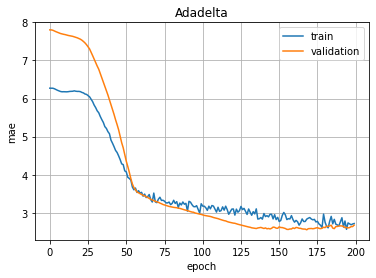

6/6 [==============================] - 0s 2ms/step - loss: 104.9597 - mae: 2.4945


[104.959716796875, 2.4945499897003174]

In [73]:
"""
Resource 3
"""
plt.plot(history_optimizer4.history['mae'])
plt.plot(history_optimizer4.history['val_mae'])
plt.title('Adadelta')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.ylim(top = 8)
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.show()

score_optimizer4 = model_optimizer4.evaluate(X_test, y_test, verbose=1)
score_optimizer4

### Comparison

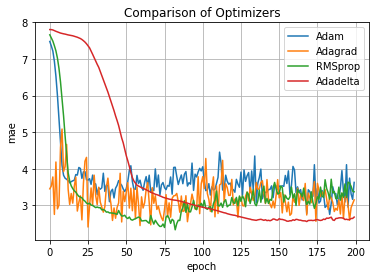

Adam 2.3634872436523438
Adagrad 2.0875558853149414
RMSprop 2.708735942840576
Adadelta 2.4945499897003174


In [81]:
plt.plot(history_optimizer1.history['val_mae'])
plt.plot(history_optimizer2.history['val_mae'])
plt.plot(history_optimizer3.history['val_mae'])
plt.plot(history_optimizer4.history['val_mae'])

plt.title('Comparison of Optimizers')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['Adam', 'Adagrad', 'RMSprop', 'Adadelta'], loc='upper right')
plt.ylim(top = 8)
plt.grid()
plt.show()

print('Adam', score_optimizer1[1])
print('Adagrad', score_optimizer2[1])
print('RMSprop', score_optimizer3[1])
print('Adadelta', score_optimizer4[1])

Resources:
1. Keras Sequential model: https://keras.io/guides/sequential_model/
2. Train model: https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
3. Display model training history: https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/